In [1]:
import pandas as pd
import numpy as np

In [4]:
#read in cleaned, merged and encoded data csv for permit model
df = pd.read_csv("../data/final_permit_encode.csv", low_memory=False)

In [5]:
print(df.shape)
print(df.columns)
df.head()

(1984, 46)
Index(['pdox_b1_id', 'elapsed_workdays', 'alias', 'Project_Status',
       'job_class', 'Ward', 'green_floor_area', 'use_type', 'permit_type',
       'PRICE', 'QUALIFIED', 'LIVING_GBA', 'USECODE', 'LANDAREA', 'EYFC',
       'use_change', 'num_units_change', 'gfa_change', 'ReviewCycle',
       'CFA_Review', 'Chinatown_Review', 'DC_Water_Review', 'DDOE_Review',
       'DDOT_Review', 'DOEE_Review', 'DOH_Review', 'EISF_Review',
       'Electrical_Review', 'Elevator_Review', 'Energy_Review', 'File_Room',
       'Fire_Review', 'Green_Review', 'HPRB_Review', 'Mechanical_Review',
       'NCPC_Review', 'PRC', 'Plumbing_Review', 'QA_Review',
       'Structural_Review', 'WASA_Review', 'WMATA_Review',
       'White_House_Review', 'Zoning_Review', 'over_90', 'over_150'],
      dtype='object')


,pdox_b1_id,elapsed_workdays,alias,Project_Status,job_class,Ward,green_floor_area,use_type,permit_type,PRICE,...,PRC,Plumbing_Review,QA_Review,Structural_Review,WASA_Review,WMATA_Review,White_House_Review,Zoning_Review,over_90,over_150
0,AN1700124,62.0,0,0,2,6.0,0.000000,1,0,6.209515,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,23.0,0,0
1,AN1700215,100.0,1,6,6,5.0,3.260071,1,0,5.525045,...,9.0,0.0,7.0,26.0,0.0,0.0,0.0,14.0,1,0
2,AN1700235,65.0,0,0,3,5.0,3.147367,0,0,5.755875,...,5.0,0.0,8.0,18.0,0.0,0.0,0.0,3.0,0,0
3,AN1700242,91.0,0,0,7,1.0,4.238508,0,0,5.705008,...,5.0,0.0,11.0,32.0,0.0,0.0,0.0,26.0,1,0
4,AN1700244,57.0,1,0,6,2.0,2.389928,1,0,6.172507,...,1.0,0.0,6.0,18.0,0.0,0.0,0.0,21.0,0,0


In [6]:
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [7]:
#create feature matrix and target array
y = df['over_150']
X = df.drop(['pdox_b1_id', 'elapsed_workdays', 'over_150', 'over_90'], axis=1)

In [8]:
#split the dataset into test and trains sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
#LOGIT MODEL
from sklearn.linear_model import LogisticRegression

In [10]:
logisticRegr = LogisticRegression(solver='lbfgs')
l = logisticRegr.fit(X_train, np.ravel(y_train))
predictions = l.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
print('accuracy for logistic regression model: %f' %accuracy_score(np.ravel(y_test),predictions))
print('Training score: ', l.score(X_test, y_test))

accuracy for logistic regression model: 0.976510
Training score:  0.9765100671140939


In [12]:
#print coefficients
np.set_printoptions(precision=2, suppress=True)
np.ravel(l.coef_)

array([-0.76,  0.29, -0.48, -0.78, -0.69, -0.85,  0.  , -2.13,  0.38,
        0.23, -0.02, -0.7 , -0.07, -0.27, -0.52, -0.44, -0.14,  0.25,
       -0.  ,  0.21,  0.04,  0.17,  0.19,  0.04,  0.03,  0.2 ,  0.36,
        0.17,  0.  ,  0.15,  0.21,  0.16,  0.21,  0.  ,  0.08,  0.16,
        0.21,  0.19,  0.02,  0.23,  0.18,  0.18])

In [13]:
from tabulate import tabulate

#make a table for the coefficient estimates
coef = l.coef_
coef = coef[0].tolist()
headers = list(X.columns)

tt = list(zip(headers, coef))
print(tabulate(tt, headers =['variable', 'coefficient'], tablefmt="fancy_grid"))

ModuleNotFoundError: No module named 'tabulate'

In [14]:
#MAKE ROC FOR LOGIT 
# true positives and false positives for logit
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions, pos_label=1)
rates_logit = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
roc_auc_logit = auc(rates_logit['fpr'], rates_logit['tpr'])
print('AUC: ', roc_auc_logit)

AUC:  0.9722631682389936


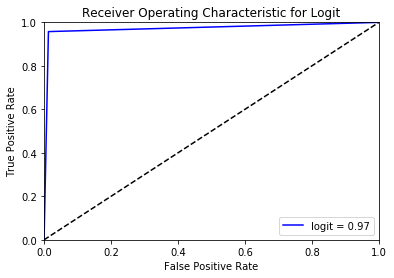

In [15]:
plt.plot(rates_logit.fpr, rates_logit.tpr, 'b', label = 'logit = %0.2f' % roc_auc_logit)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic for Logit')
plt.legend(loc = 'lower right')
plt.show()